In [1]:
# Configs
exp_num = 3114
variable = "HWF"

In [2]:
import sys
sys.path.insert(1, '../')
import xarray
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rc
from paths import MERRA2_DATA, FIGURE_IMAGE_OUTPUT, OUT_ALL_AVGS_1980_2000
import xesmf as xe
import cartopy.crs as ccrs
import regionmask

In [3]:
merra_min_path = f"tn90pct_heatwaves_MERRA2_rNone_{exp_num}_yearly_summer.nc"
merra_max_path = f"tx90pct_heatwaves_MERRA2_rNone_{exp_num}_yearly_summer.nc"
merra2_min = xarray.open_dataset(MERRA2_DATA + merra_min_path)[f"{variable}_tn9pct"].mean(dim="time").dt.days
merra2_max = xarray.open_dataset(MERRA2_DATA + merra_max_path)[f"{variable}_tx9pct"].mean(dim="time").dt.days

ensemble_min_avg = xarray.open_dataset(OUT_ALL_AVGS_1980_2000 + f"ALL-min-{exp_num}.nc")[f"{variable}_tn90pct"]\
    .sel(time=("1980", "2010"))
ensemble_min_avg = ensemble_min_avg.sel(time=("1980", "2010")).mean(dim="time").dt.days
ensemble_max_avg = xarray.open_dataset(OUT_ALL_AVGS_1980_2000 + f"ALL-max-{exp_num}.nc")[f"{variable}_tx90pct"]\
    .sel(time=("1980", "2010"))
ensemble_max_avg = ensemble_max_avg.sel(time=("1980", "2010")).mean(dim="time").dt.days

min_regridder = xe.Regridder(merra2_min, ensemble_min_avg, 'bilinear')
max_regridder = xe.Regridder(merra2_max, ensemble_max_avg, 'bilinear')

merra2_min = min_regridder(merra2_min)
merra2_max = max_regridder(merra2_max)

/projects/dgs/rh5_local/anaconda/climate/lib/python3.8/site-packages/xarray/core/dataarray.py:679: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/projects/dgs/rh5_local/anaconda/climate/lib/python3.8/site-packages/xesmf/frontend.py:450: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


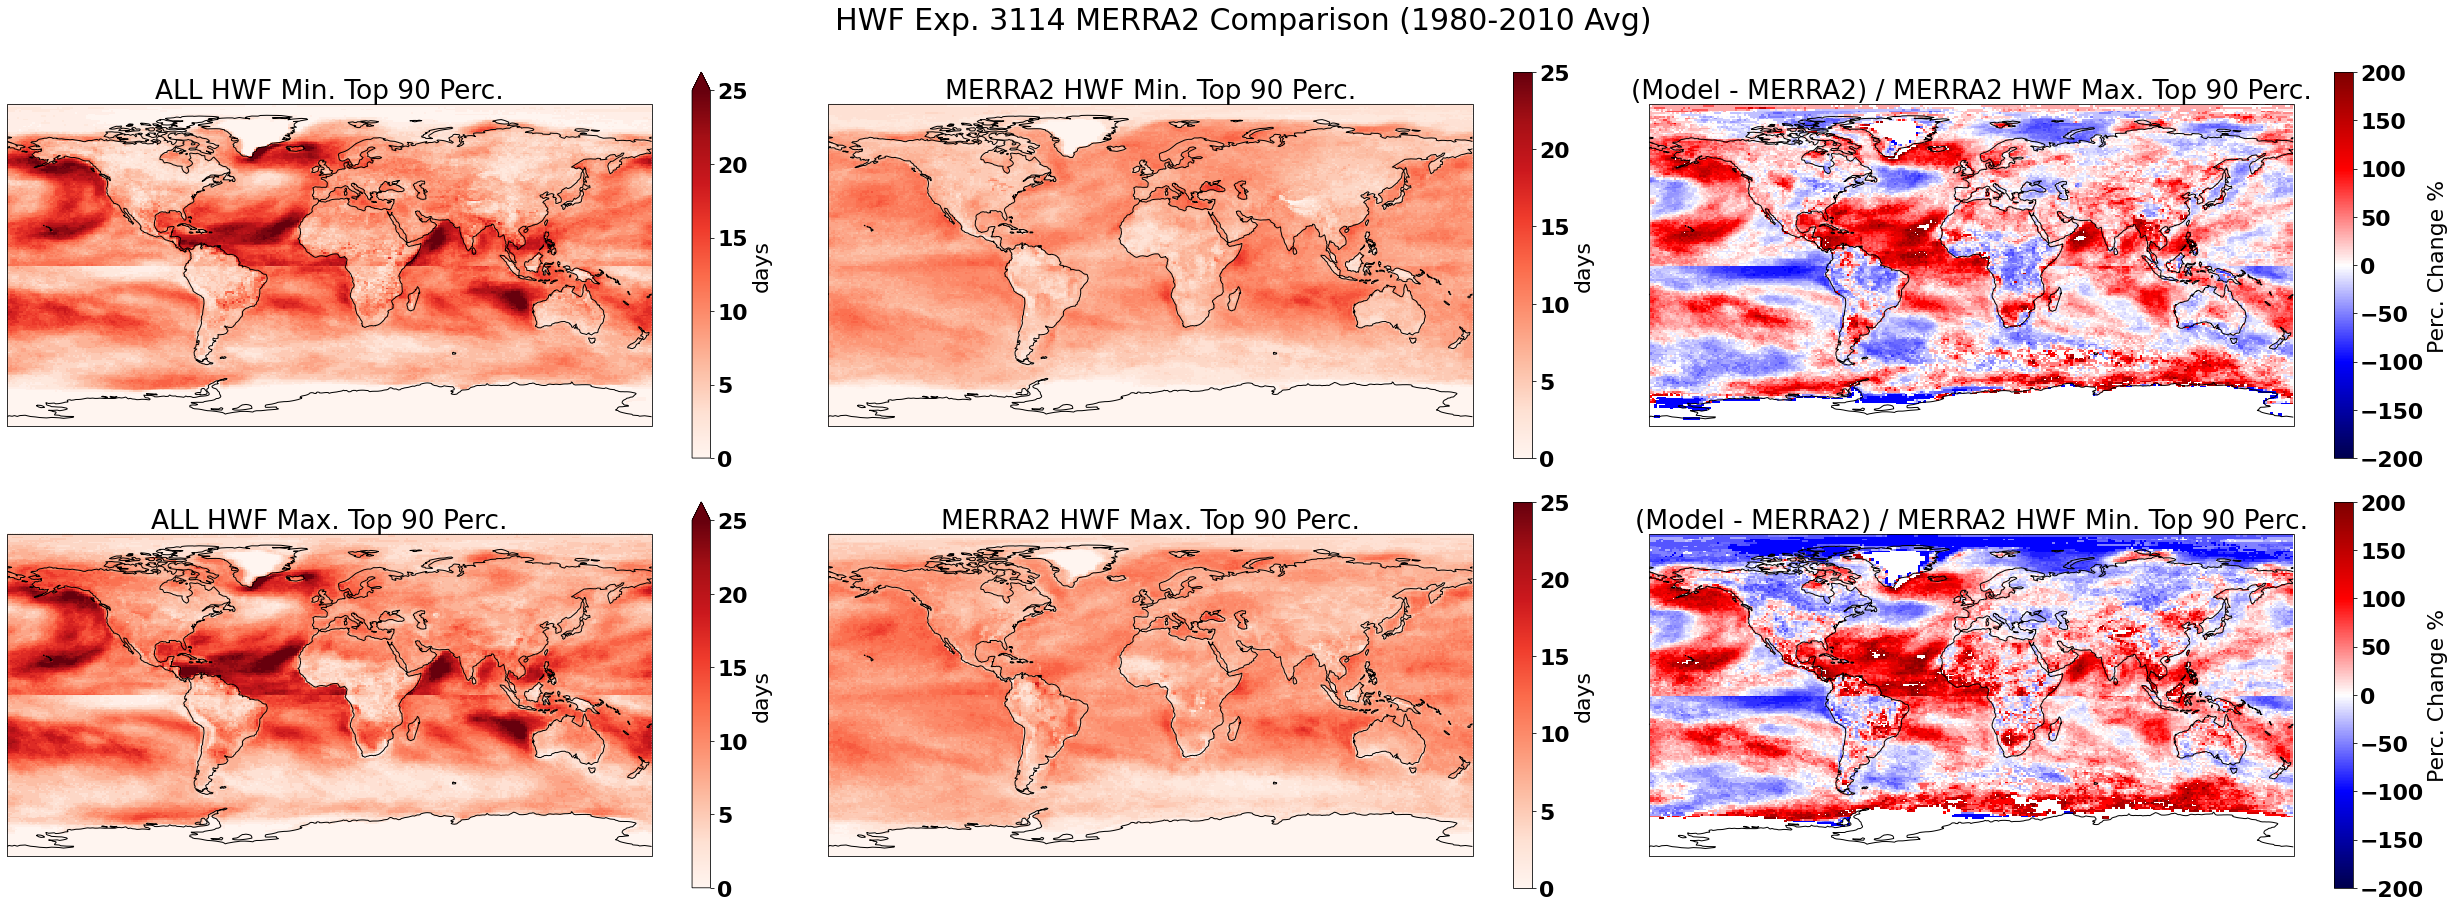

In [4]:
f, ((ax1, ax2, ax5), (ax3, ax4, ax6)) = plt.subplots(2, 3, figsize=(35, 13), facecolor='w', subplot_kw=dict(projection=ccrs.PlateCarree()))
f.suptitle(f"{variable} Exp. {exp_num} MERRA2 Comparison (1980-2010 Avg)", fontsize=30)
font = {'family': 'normal',
        'weight': 'bold',
        'size': 22}
rc('font', **font)

vmin = 0
vmax = 25
#norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

ensemble_min_avg.plot(ax=ax1, cmap='Reds', vmax=vmax, vmin=vmin, rasterized=True)
ax1.set_title(f"ALL {variable} Min. Top 90 Perc.")
ax1.coastlines()

merra2_min.plot(ax=ax2, cmap='Reds', vmax=vmax, vmin=vmin, rasterized=True)
ax2.set_title(f"MERRA2 {variable} Min. Top 90 Perc.")
ax2.coastlines()

ensemble_max_avg.plot(ax=ax3, cmap='Reds', vmax=vmax, vmin=vmin, rasterized=True)
ax3.set_title(f"ALL {variable} Max. Top 90 Perc.")
ax3.coastlines()

merra2_max.plot(ax=ax4, cmap='Reds', vmax=vmax, vmin=vmin, rasterized=True)
ax4.set_title(f"MERRA2 {variable} Max. Top 90 Perc.")
ax4.coastlines()

vmin = -200
vmax = 200
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

max_compare = ((ensemble_max_avg - merra2_max) / merra2_max) * 100
max_compare = max_compare.rename("Perc. Change %")
max_compare.where(max_compare < vmax).plot(ax=ax5, cmap='seismic', vmax=vmax, vmin=vmin, norm=norm, rasterized=True)
ax5.set_title(f"(Model - MERRA2) / MERRA2 {variable} Max. Top 90 Perc.")
ax5.coastlines()

min_compare = ((ensemble_min_avg - merra2_min) / merra2_min) * 100
min_compare = min_compare.rename("Perc. Change %")
min_compare.where(min_compare < vmax).plot(ax=ax6, cmap='seismic', vmax=vmax, vmin=vmin, norm=norm, rasterized=True)
ax6.set_title(f"(Model - MERRA2) / MERRA2 {variable} Min. Top 90 Perc.")
ax6.coastlines()

f.tight_layout()

In [5]:
f.savefig(f"{FIGURE_IMAGE_OUTPUT}/exp-{exp_num}-{variable}-MERRA2-comparison.png")

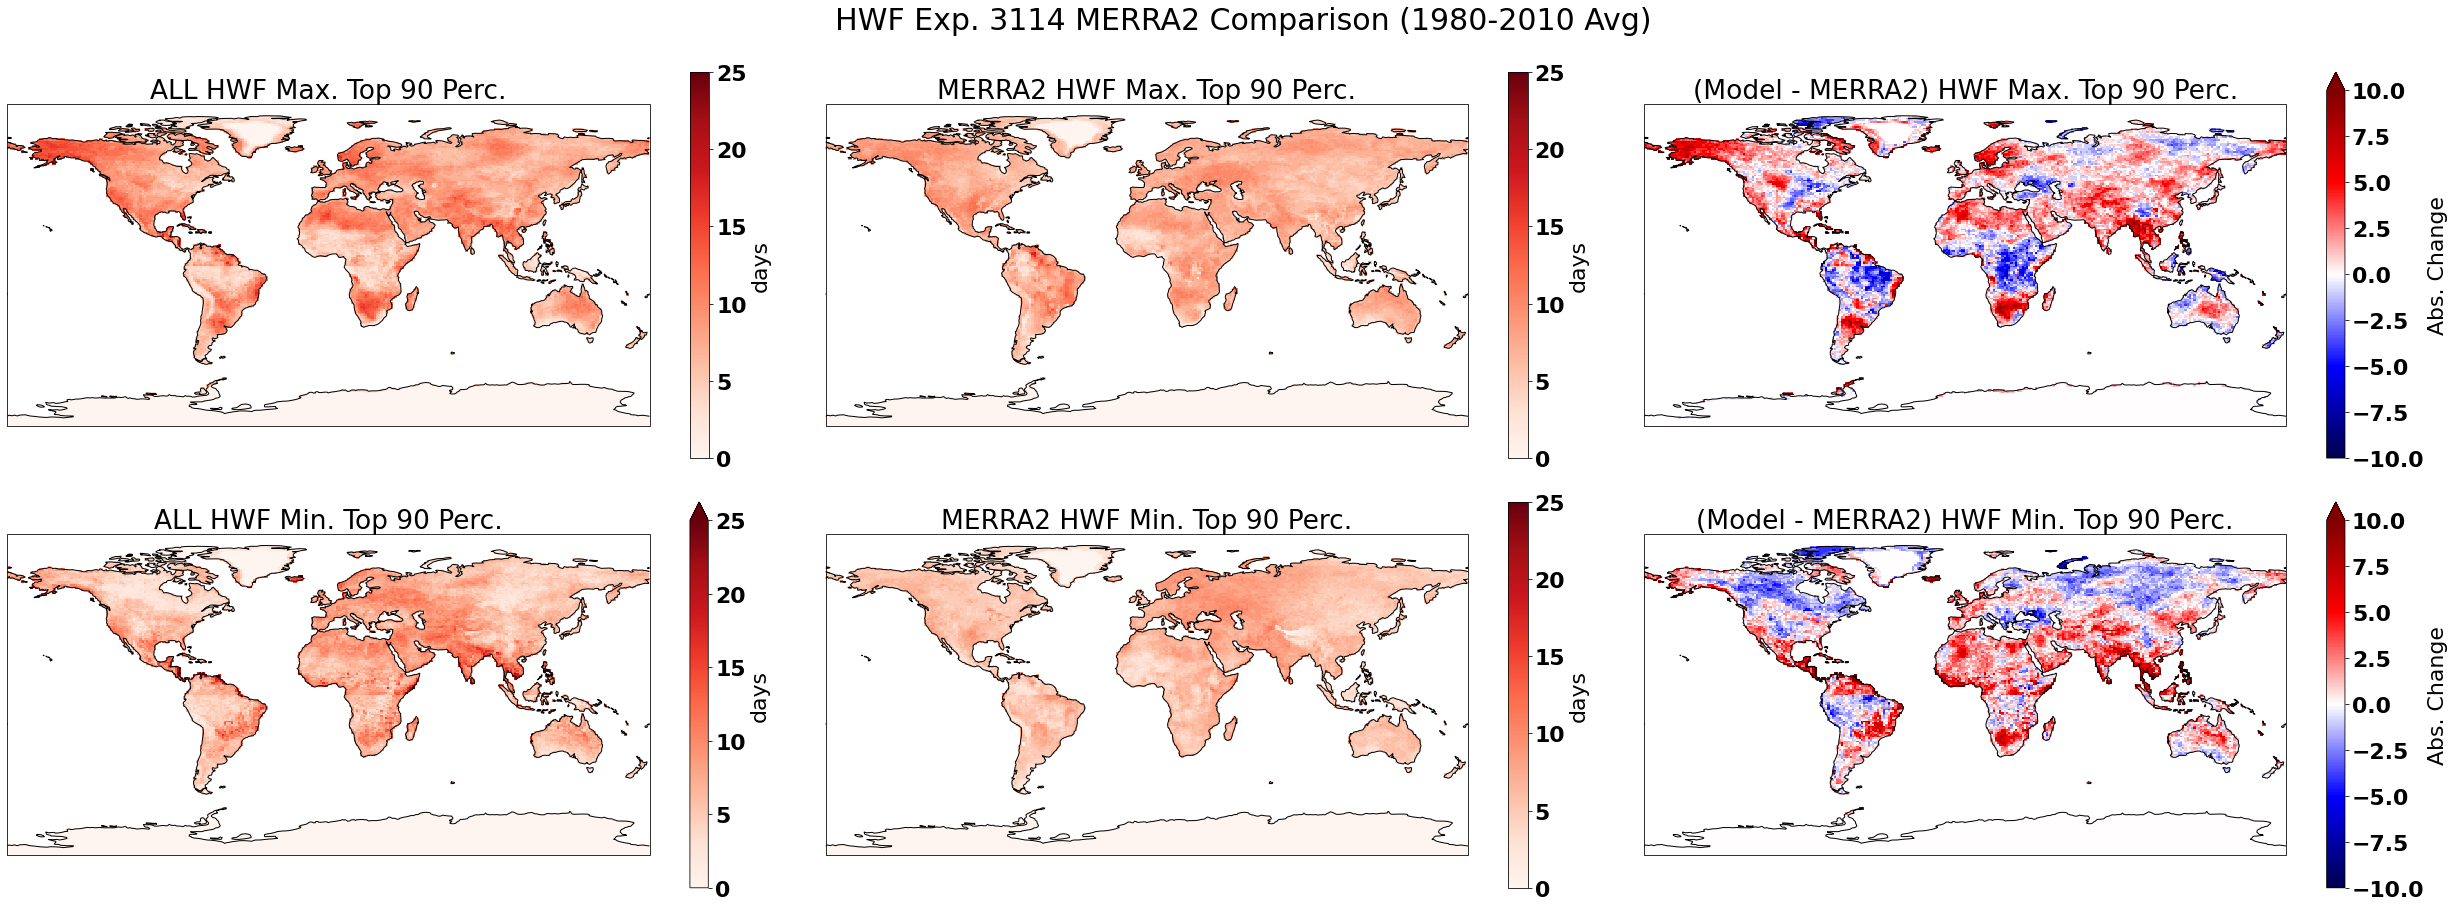

In [18]:
land = regionmask.defined_regions.natural_earth.land_110

f, ((ax1, ax2, ax5), (ax3, ax4, ax6)) = plt.subplots(2, 3, figsize=(35, 13), facecolor='w', subplot_kw=dict(projection=ccrs.PlateCarree()))
f.suptitle(f"{variable} Exp. {exp_num} MERRA2 Comparison (1980-2010 Avg)", fontsize=30)
font = {'family': 'normal',
        'weight': 'bold',
        'size': 22}
rc('font', **font)

vmin = 0
vmax = 25
#norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

ensemble_min_avg.where(land.mask(ensemble_min_avg) == 0).plot(ax=ax3, cmap='Reds', vmax=vmax, vmin=vmin, rasterized=True)
ax3.set_title(f"ALL {variable} Min. Top 90 Perc.")
ax3.coastlines()

merra2_min.where(land.mask(merra2_min) == 0).plot(ax=ax4, cmap='Reds', vmax=vmax, vmin=vmin, rasterized=True)
ax4.set_title(f"MERRA2 {variable} Min. Top 90 Perc.")
ax4.coastlines()

ensemble_max_avg.where(land.mask(ensemble_max_avg) == 0).plot(ax=ax1, cmap='Reds', vmax=vmax, vmin=vmin, rasterized=True)
ax1.set_title(f"ALL {variable} Max. Top 90 Perc.")
ax1.coastlines()

merra2_max.where(land.mask(merra2_max) == 0).plot(ax=ax2, cmap='Reds', vmax=vmax, vmin=vmin, rasterized=True)
ax2.set_title(f"MERRA2 {variable} Max. Top 90 Perc.")
ax2.coastlines()

vmin = -10
vmax = 10
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

# vmin = -200
# vmax = 200

max_compare = ((ensemble_max_avg - merra2_max)) #((ensemble_max_avg - merra2_max) / merra2_max) * 100
max_compare = max_compare.rename("Abs. Change")
max_compare.where(land.mask(max_compare) == 0).plot(ax=ax5, cmap='seismic', vmax=vmax, vmin=vmin, norm=norm, rasterized=True)
ax5.set_title(f"(Model - MERRA2) {variable} Max. Top 90 Perc.")
ax5.coastlines()

min_compare = ((ensemble_min_avg - merra2_min)) #((ensemble_min_avg - merra2_min) / merra2_min) * 100
min_compare = min_compare.rename("Abs. Change")
min_compare.where(land.mask(min_compare) == 0).plot(ax=ax6, cmap='seismic', vmax=vmax, vmin=vmin, norm=norm, rasterized=True)
ax6.set_title(f"(Model - MERRA2) {variable} Min. Top 90 Perc.")
ax6.coastlines()

f.tight_layout()

In [7]:
f.savefig(f"{FIGURE_IMAGE_OUTPUT}/exp-{exp_num}-{variable}-MERRA2-comparison-landmasked.png")